In [88]:
# Research Question: What other aspects of wellness predict whether one uses physical activity as a coping mechanism?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [89]:
# Imports 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, 
                            mean_squared_error, 
                            r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [90]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")
#data.describe()

In [91]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

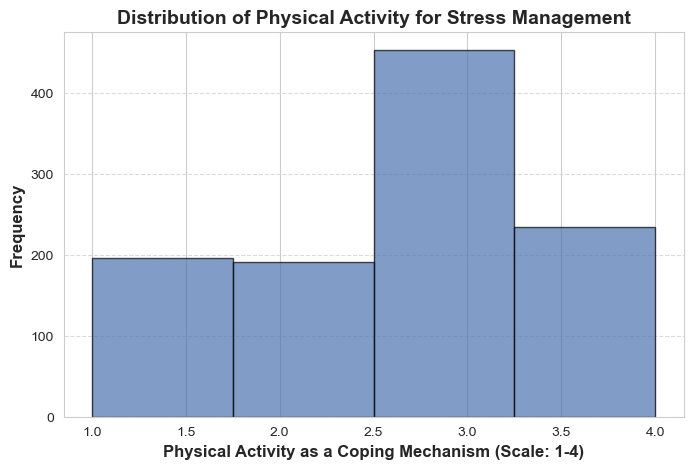

In [92]:
# Basic histogram of the Physical_Activity_Stress variable

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

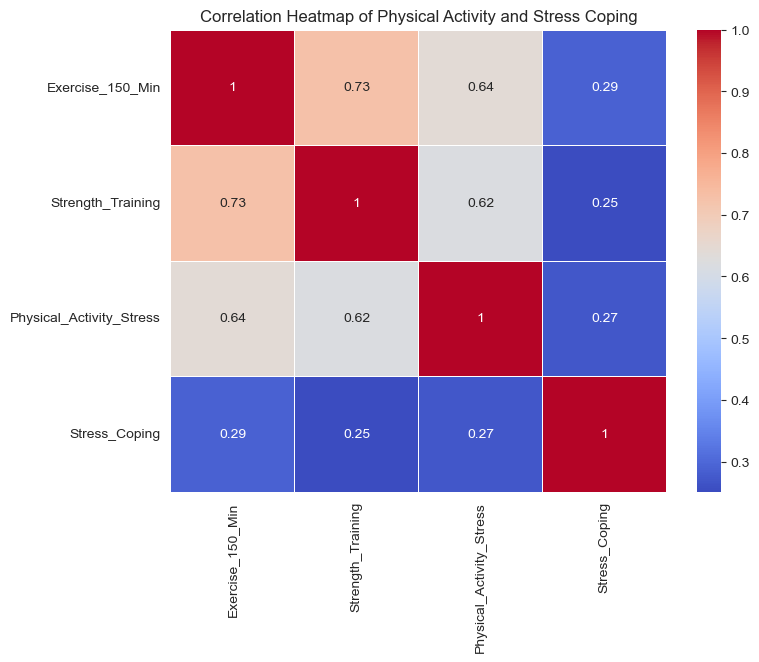

In [93]:
# Correlation heatmap of physical-related variables and Stress_Coping

corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity and Stress Coping")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a slight correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

In [94]:
# ---- INITIAL MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: these are variables I assumed to be important. Output --> R^2 of 0.477. p-values are iffy.
# [FOR PHYSICAL_ACTIVITY_STRESS]

predictors = ["Exercise_150_Min", "Strength_Training", "Stress_Coping", "Feelings", 
              "7_Hours_Sleep", "Controlled_Life", "Parent_Financial_Support",
              "Strong_Social_Network", "Balanced_Diet", "Close_Relationships", 
              "Understand_Purpose"]

X = data[predictors].fillna(data[predictors].mean())
y = data["Physical_Activity_Stress"].fillna(data["Physical_Activity_Stress"].mean())

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     87.97
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):          5.10e-141
Time:                              11:13:10   Log-Likelihood:                -1187.7
No. Observations:                      1075   AIC:                             2399.
Df Residuals:                          1063   BIC:                             2459.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [95]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: This is AFTER running stepwise regression in R.
# p-values are significant and R^2 is approximately 0.5
# [FOR PHYSICAL_ACTIVITY_STRESS]

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity', 'Exercise_150_Min',
    'Strength_Training', 'Healthy_Meal_Choices', 'Avoid_Alcohol',
    'Regular_Medical_Visits', 'Manage_Conflict', 'Feelings', 'Body_Image',
    'Learn_New_Things', 'Challenges_Growth', 'Current_Events',
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending',
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution',
    'Family_Grad_History', 'Controlled_Life', 'Openness', 'Budget'
]

X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"]

final_model = sm.OLS(y_final, sm.add_constant(X_final)).fit()
print(final_model.summary())

# Analysis and interpretation:
# - Exercise and strength training remain strong positive predictors of using physical activity to cope with stress.
# - Involvement in club sports and social organizations (like sororities/fraternities) also seems to be beneficial.
# - The added predictors from R, like "Controlled_Life", "Openness", and "Budget", may provide additional insights into personal and financial factors affecting physical activity as a coping mechanism.

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.510
Model:                                  OLS   Adj. R-squared:                  0.498
Method:                       Least Squares   F-statistic:                     43.39
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):          3.35e-131
Time:                              11:13:10   Log-Likelihood:                -1055.6
No. Observations:                       983   AIC:                             2159.
Df Residuals:                           959   BIC:                             2277.
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\305813949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="rocket")


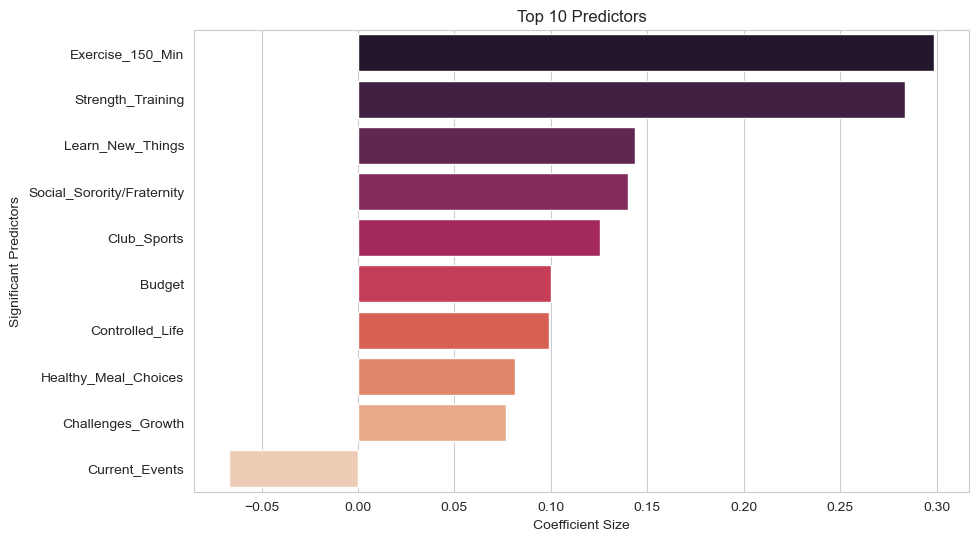

In [96]:
# --- VISUALIZATION FOR STEPWISE MODEL ---

coefs = final_model.params[1:].sort_values(key=abs, ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs.values, y=coefs.index, palette="rocket")
plt.title("Top 10 Predictors")
plt.xlabel("Coefficient Size")
plt.ylabel("Significant Predictors")
plt.show()

# Model identifies Exercise_150_Min and Strength_Training to be the strongest predictors of using physical activity for stress management/coping
# Also identifies variables like Learn_New_Things and engaging in a fraternity or sorority, or club sports play a "secondary" role.
# Less engagement in current events may result in relying more on physical activity for stress.

In [97]:
# LOGISITIC REGRESSION for the above model [FOR PHYSICAL_ACTIVITY_STRESS]

y_ordinal = clean_data["Physical_Activity_Stress"].astype(pd.CategoricalDtype(ordered=True))

ordinal_model = OrderedModel(y_ordinal, clean_data[final_predictors], distr="logit")

ordinal_result = ordinal_model.fit(method="bfgs")

print(ordinal_result.summary())

Optimization terminated successfully.
         Current function value: 0.961922
         Iterations: 55
         Function evaluations: 58
         Gradient evaluations: 58
                                OrderedModel Results                                
Dep. Variable:     Physical_Activity_Stress   Log-Likelihood:                -945.57
Model:                         OrderedModel   AIC:                             1943.
Method:                  Maximum Likelihood   BIC:                             2070.
Date:                      Wed, 26 Mar 2025                                         
Time:                              11:13:14                                         
No. Observations:                       983                                         
Df Residuals:                           957                                         
Df Model:                                23                                         
                                 coef    std err          z    

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\814896795.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odds_ratios, y=significant, palette="Blues_d")


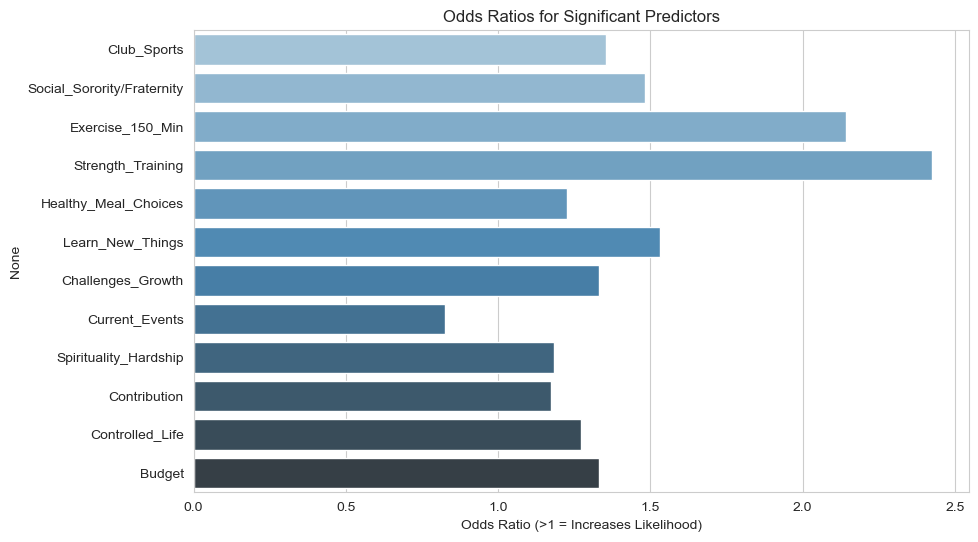

In [98]:
# --- ORDINAL LOGISTIC REGRESSION VISUALIZATION ---
# Extract significant predictors (p < 0.05)

significant = ordinal_result.pvalues[ordinal_result.pvalues < 0.05].index[:-3]
odds_ratios = np.exp(ordinal_result.params[significant])
plt.figure(figsize=(10, 6))
sns.barplot(x=odds_ratios, y=significant, palette="Blues_d")
plt.title("Odds Ratios for Significant Predictors")
plt.xlabel("Odds Ratio (>1 = Increases Likelihood)")
plt.show()

# Confirms that Exercising 150 + minutes and engaging in strength training more than doubles the likelihood of using physical activity for stress (OR > 2)
# Control over Budget, or perception of a controlled life, increases the likelihood of using physical activity for stress.

In [99]:
# RANDOM FOREST MODEL --- NUMERIC TREATMENT

rf_reg = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_reg.fit(X, y)
oob_pred = rf_reg.oob_prediction_
print(f"OOB MAE: {mean_absolute_error(y, oob_pred):.3f}")
print(f"OOB RMSE: {np.sqrt(mean_squared_error(y, oob_pred)):.3f}")

# NOTE:
# I ran an RF treating Physical_Activity_Stress as categorical (since it's ordinal).
# OOB for that: 0.193, Log Loss: 2.127 [LL > 1 leads to uncertainty]

# This model interpretation:
# With MAE = 0.629, predictions for a true value of 2 typically fall between 1.37 and 2.63 on a Likert Scale

OOB MAE: 0.629
OOB RMSE: 0.787


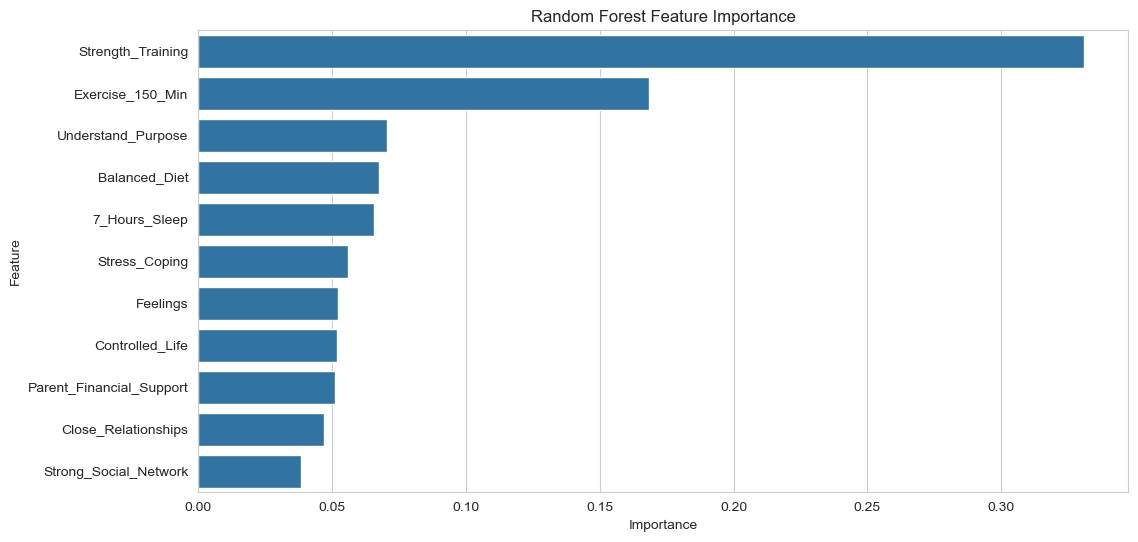

In [100]:
# Random Forest Variable Importance plot for Physical_Activity_Stress

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(15))
plt.title("Random Forest Feature Importance")
plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\3411103825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')


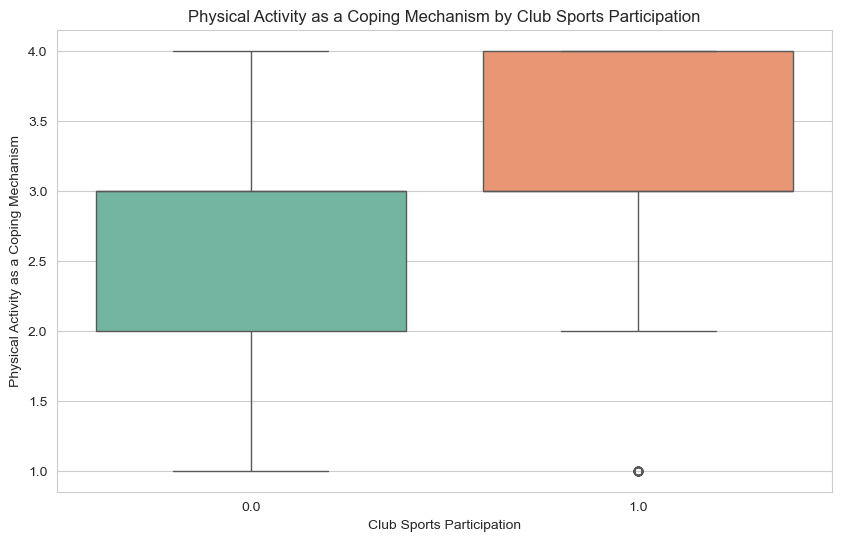

In [101]:
# BOXPLOT -- Participating in Club Sports vs Physical_Activity_Stress

plt.figure(figsize=(10, 6))
sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')
plt.title('Physical Activity as a Coping Mechanism by Club Sports Participation')
plt.xlabel('Club Sports Participation')
plt.ylabel('Physical Activity as a Coping Mechanism')
plt.show()

# Shows that students participating in club sports tend to report higher use of physical activity for stress-coping

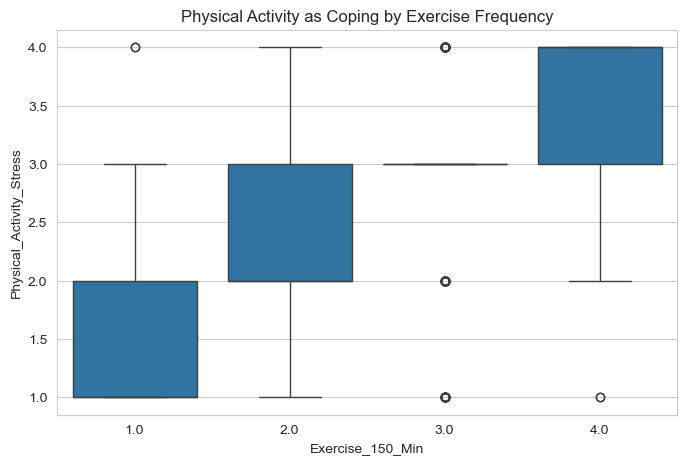

In [102]:
# BOXPLOT -- Exercise_150_Min vs Physical_Activity_Stress (Frequency)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data)
plt.title("Physical Activity as Coping by Exercise Frequency")
plt.show()

# Clear positive relationship - those meeting exercise guidelines (150+ mins) show: (1) Higher median coping scores, less variability, and fewer outliers

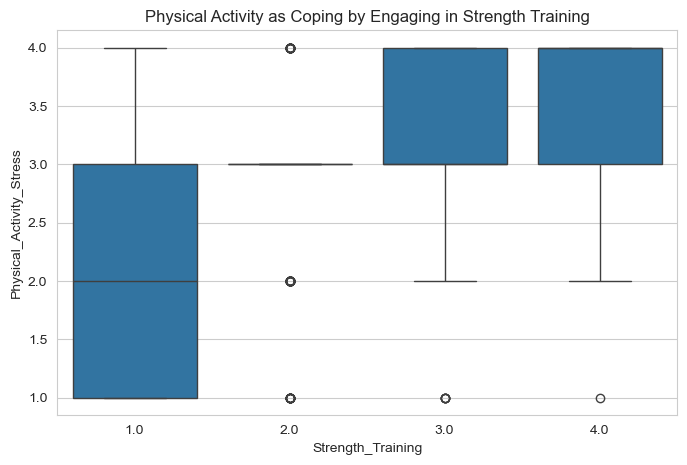

In [103]:
# BOXPLOT -- Strength_Training vs Physical_Activity_Stress

plt.figure(figsize=(8, 5))
sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress', data=data)
plt.title("Physical Activity as Coping by Engaging in Strength Training")
plt.show()

# Similar to Exercise_150_Min, but there are stronger results on 3-4, rather than before just having strong results on 4. 